<a href="https://colab.research.google.com/github/damianmtz98/Aprendizaje-Automatico-MCD/blob/main/ARTICULO_FINAL_CODIGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [ ]:
hpdata= pd.read_csv("heart_prediction.csv")
hpdata.head()

,id,Edad,Sexo,TDP,BP,Colesterol,FBS over 120,EKG results,FC,EA,ST depression,Slope of ST,Number of vessels fluro,Thallium,Cardiopatia
0,0,70,1,4,130,322,0,2,109,0,2,2,3,3,0
1,1,67,0,3,115,564,0,2,160,0,2,2,0,7,1
2,2,57,1,2,124,261,0,0,141,0,0,1,0,7,0
3,3,64,1,4,128,263,0,0,105,1,0,2,1,7,1
4,4,74,0,2,120,269,0,2,121,1,0,1,1,3,1


In [ ]:
 hpdata.head()

,id,Edad,Sexo,TDP,BP,Colesterol,FBS over 120,EKG results,FC,EA,ST depression,Slope of ST,Number of vessels fluro,Thallium,Cardiopatia
0,0,70,1,4,130,322,0,2,109,0,2,2,3,3,0
1,1,67,0,3,115,564,0,2,160,0,2,2,0,7,1
2,2,57,1,2,124,261,0,0,141,0,0,1,0,7,0
3,3,64,1,4,128,263,0,0,105,1,0,2,1,7,1
4,4,74,0,2,120,269,0,2,121,1,0,1,1,3,1


In [ ]:
hpdata.shape


(270, 15)

In [ ]:
hpdata = hpdata.loc[:,[ 'Sexo', 'Edad', 'TDP', 'Colesterol', 'EA', 'FC', 'Cardiopatia']]
hpdata.head()

,Sexo,Edad,TDP,Colesterol,EA,FC,Cardiopatia
0,1,70,4,322,0,109,0
1,0,67,3,564,0,160,1
2,1,57,2,261,0,141,0
3,1,64,4,263,1,105,1
4,0,74,2,269,1,121,1


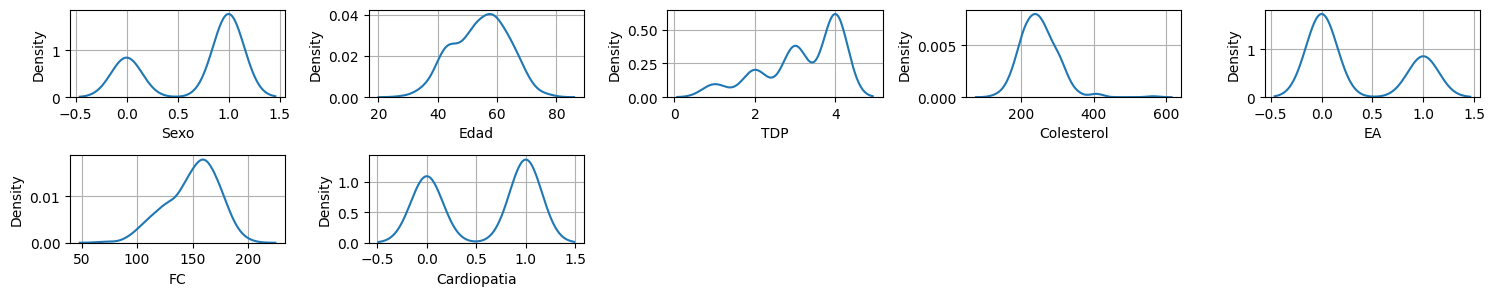

In [ ]:

r=5
c=5
it=1
for i in hpdata:
    plt.subplot(r,c,it)
    sns.distplot(hpdata.loc[:,i],hist=False)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()
     

In [ ]:
y = hpdata['Cardiopatia']
x = hpdata.drop('Cardiopatia',axis=1)
     

In [ ]:
rs = RobustScaler()

In [ ]:
x = pd.DataFrame(rs.fit_transform(x),columns=x.columns)
x.head()
     

,Sexo,Edad,TDP,Colesterol,EA,FC
0,0.0,1.153846,1.0,1.149254,0.0,-1.348485
1,-1.0,0.923077,0.0,4.761194,0.0,0.196970
2,0.0,0.153846,-1.0,0.238806,0.0,-0.378788
3,0.0,0.692308,1.0,0.268657,1.0,-1.469697
4,-1.0,1.461538,-1.0,0.358209,1.0,-0.984848


In [ ]:

x.isnull().sum()

Sexo          0
Edad          0
TDP           0
Colesterol    0
EA            0
FC            0
dtype: int64

In [ ]:

x.shape

(270, 6)

In [ ]:
x_hp = x[0:135]
x_hp

,Sexo,Edad,TDP,Colesterol,EA,FC
0,0.0,1.153846,1.0,1.149254,0.0,-1.348485
1,-1.0,0.923077,0.0,4.761194,0.0,0.196970
2,0.0,0.153846,-1.0,0.238806,0.0,-0.378788
3,0.0,0.692308,1.0,0.268657,1.0,-1.469697
4,-1.0,1.461538,-1.0,0.358209,1.0,-0.984848
...,...,...,...,...,...,...
130,-1.0,0.615385,1.0,0.358209,1.0,0.469697
131,0.0,0.846154,1.0,-0.492537,1.0,-0.651515
132,0.0,-1.000000,1.0,-0.283582,0.0,0.742424
133,0.0,0.692308,1.0,0.014925,1.0,-1.742424


In [ ]:
x_hp1 = x[135:]
x_hp1

,Sexo,Edad,TDP,Colesterol,EA,FC
135,-1.0,-0.692308,0.0,-1.014925,1.0,0.196970
136,-1.0,0.923077,0.0,0.477612,0.0,0.560606
137,0.0,0.076923,1.0,0.059701,1.0,-0.287879
138,-1.0,-1.615385,-1.0,-0.522388,0.0,1.166667
139,0.0,0.153846,1.0,-0.567164,1.0,0.439394
...,...,...,...,...,...,...
265,0.0,-0.230769,0.0,-0.686567,0.0,0.257576
266,0.0,-0.846154,-1.0,0.268657,0.0,0.590909
267,-1.0,0.076923,-1.0,0.731343,0.0,-0.015152
268,0.0,0.153846,1.0,-0.791045,0.0,-0.166667


In [ ]:
y_hp = y[0:135]
y_hp

0      0
1      1
2      0
3      1
4      1
      ..
130    0
131    0
132    1
133    0
134    1
Name: Cardiopatia, Length: 135, dtype: int64

In [ ]:
y_hp1 = y[135:]
y_hp1

135    1
136    1
137    0
138    1
139    1
      ..
265    1
266    1
267    1
268    1
269    0
Name: Cardiopatia, Length: 135, dtype: int64

In [ ]:
xc = sm.add_constant(x_hp)
xc.head()

,const,Sexo,Edad,TDP,Colesterol,EA,FC
0,1.0,0.0,1.153846,1.0,1.149254,0.0,-1.348485
1,1.0,-1.0,0.923077,0.0,4.761194,0.0,0.196970
2,1.0,0.0,0.153846,-1.0,0.238806,0.0,-0.378788
3,1.0,0.0,0.692308,1.0,0.268657,1.0,-1.469697
4,1.0,-1.0,1.461538,-1.0,0.358209,1.0,-0.984848


In [ ]:
y_hp = y_hp.astype('int')

In [ ]:
y_hp.value_counts()

1    73
0    62
Name: Cardiopatia, dtype: int64

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()

model_list = [lr,dt,rf,gnb,knn]
cm = []
hpacc = []
for i in model_list:
    i_model = i.fit(x_hp,y_hp)
    ypred_hp1 = i_model.predict(x_hp)
    ypred_hp2 = i_model.predict(x_hp1)
    hpacc.append(accuracy_score(y_hp,ypred_hp1))
     

In [ ]:
hpacc

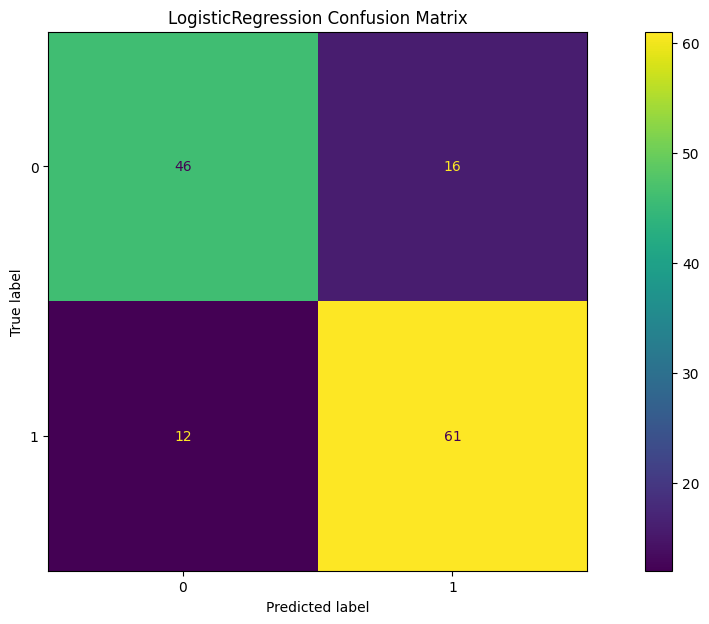

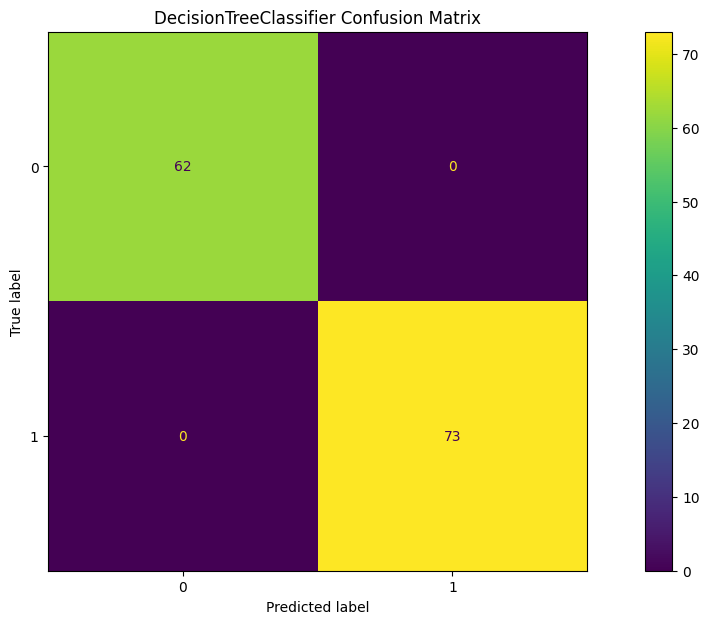

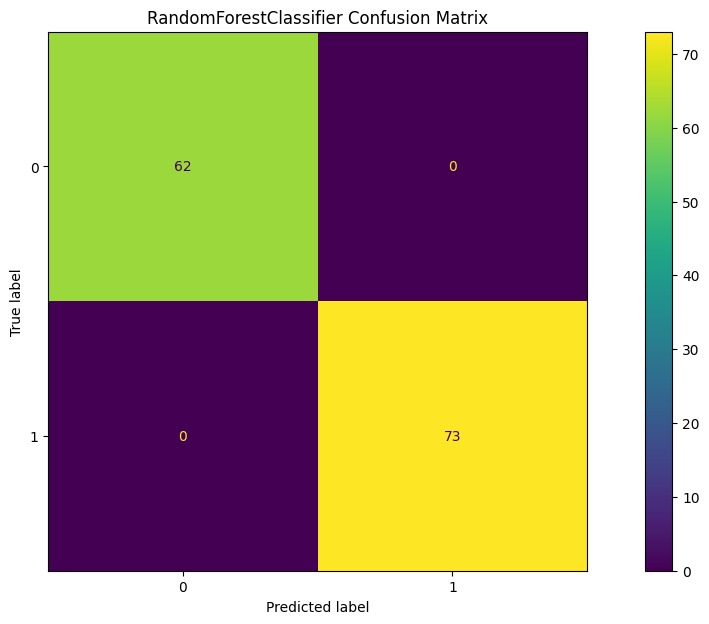

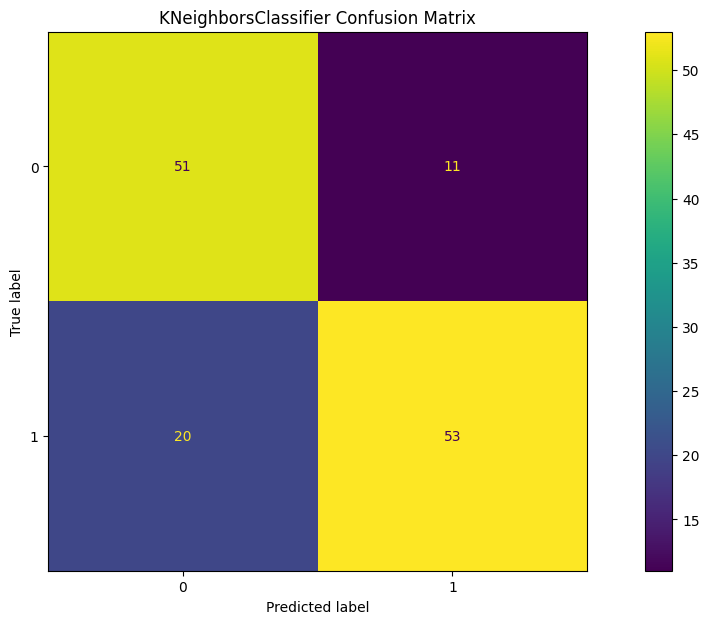

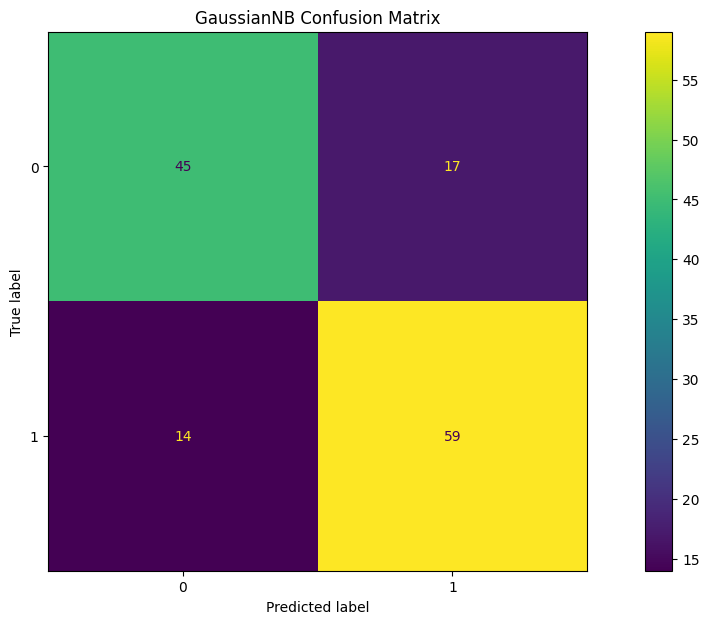

In [ ]:

for i in model_list:
    i_model = i.fit(x_hp,y_hp)
    ypred_hp = i_model.predict(x_hp)
    ypred_hp1 = i_model.predict(x_hp1)
    cm = confusion_matrix(y_hp, ypred_hp)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(str(i.__class__.__name__) + " Confusion Matrix")
    plt.show()

In [ ]:

hpdata2 = pd.read_csv("heart_prediction.csv")
hpdata2.head()
     

,id,Edad,Sexo,TDP,BP,Colesterol,FBS over 120,EKG results,FC,EA,ST depression,Slope of ST,Number of vessels fluro,Thallium,Cardiopatia
0,0,70,1,4,130,322,0,2,109,0,2,2,3,3,0
1,1,67,0,3,115,564,0,2,160,0,2,2,0,7,1
2,2,57,1,2,124,261,0,0,141,0,0,1,0,7,0
3,3,64,1,4,128,263,0,0,105,1,0,2,1,7,1
4,4,74,0,2,120,269,0,2,121,1,0,1,1,3,1


In [ ]:
hpdata2 = hpdata.loc[:,[ 'Sexo', 'Edad', 'TDP', 'Colesterol', 'EA', 'FC', 'Cardiopatia']]
hpdata2.head()

,Sexo,Edad,TDP,Colesterol,EA,FC,Cardiopatia
0,1,70,4,322,0,109,0
1,0,67,3,564,0,160,1
2,1,57,2,261,0,141,0
3,1,64,4,263,1,105,1
4,0,74,2,269,1,121,1


In [ ]:
hpdata2.shape

(270, 7)

In [ ]:
y2hp = hpdata2['Cardiopatia']
x2hp = hpdata2.drop('Cardiopatia',axis=1)

In [ ]:
rs2 = RobustScaler()

In [ ]:
x2_hp = pd.DataFrame(rs2.fit_transform(x2hp),columns=x2hp.columns)
x2_hp.head()

,Sexo,Edad,TDP,Colesterol,EA,FC
0,0.0,1.153846,1.0,1.149254,0.0,-1.348485
1,-1.0,0.923077,0.0,4.761194,0.0,0.196970
2,0.0,0.153846,-1.0,0.238806,0.0,-0.378788
3,0.0,0.692308,1.0,0.268657,1.0,-1.469697
4,-1.0,1.461538,-1.0,0.358209,1.0,-0.984848


In [ ]:
x2_hp.isnull().sum()

Sexo          0
Edad          0
TDP           0
Colesterol    0
EA            0
FC            0
dtype: int64

In [ ]:
x2_hp.shape

(270, 6)

In [ ]:

x2_hp = x2_hp[0:202]
x2_hp

,Sexo,Edad,TDP,Colesterol,EA,FC
0,0.0,1.153846,1.0,1.149254,0.0,-1.348485
1,-1.0,0.923077,0.0,4.761194,0.0,0.196970
2,0.0,0.153846,-1.0,0.238806,0.0,-0.378788
3,0.0,0.692308,1.0,0.268657,1.0,-1.469697
4,-1.0,1.461538,-1.0,0.358209,1.0,-0.984848
...,...,...,...,...,...,...
197,-1.0,-0.076923,0.0,-0.462687,0.0,0.136364
198,-1.0,1.076923,-2.0,-0.089552,0.0,-0.075758
199,0.0,1.692308,1.0,0.880597,1.0,0.257576
200,0.0,1.000000,0.0,0.477612,0.0,-0.075758


In [ ]:

x2_hp1 = x2hp[202:]
x2_hp1

,Sexo,Edad,TDP,Colesterol,EA,FC
202,1,60,4,258,1,141
203,1,51,4,299,1,173
204,1,55,4,289,1,145
205,1,52,1,298,0,178
206,0,60,3,318,0,160
...,...,...,...,...,...,...
265,1,52,3,199,0,162
266,1,44,2,263,0,173
267,0,56,2,294,0,153
268,1,57,4,192,0,148


In [ ]:
y2_hp = y2hp[0:202]
y2_hp
     

0      0
1      1
2      0
3      1
4      1
      ..
197    1
198    1
199    0
200    1
201    0
Name: Cardiopatia, Length: 202, dtype: int64

In [ ]:
y2_hp1 = y2hp[202:]
y2_hp1

202    0
203    0
204    0
205    1
206    1
      ..
265    1
266    1
267    1
268    1
269    0
Name: Cardiopatia, Length: 68, dtype: int64

In [ ]:
y2_hp = y2_hp.astype('int')

In [ ]:
y2_hp.value_counts()

1    112
0     90
Name: Cardiopatia, dtype: int64

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]
hpacc2 = []
for i in model_list:
    i_model = i.fit(x2_hp,y2_hp)
    y2pred_hp = i_model.predict(x2_hp)
    y2pred_hp1 = i_model.predict(x2_hp1)
    hpacc2.append(accuracy_score(y2_hp,y2pred_hp))

In [ ]:
hpacc2

[0.7673267326732673, 1.0, 1.0, 0.7970297029702971, 0.7722772277227723]

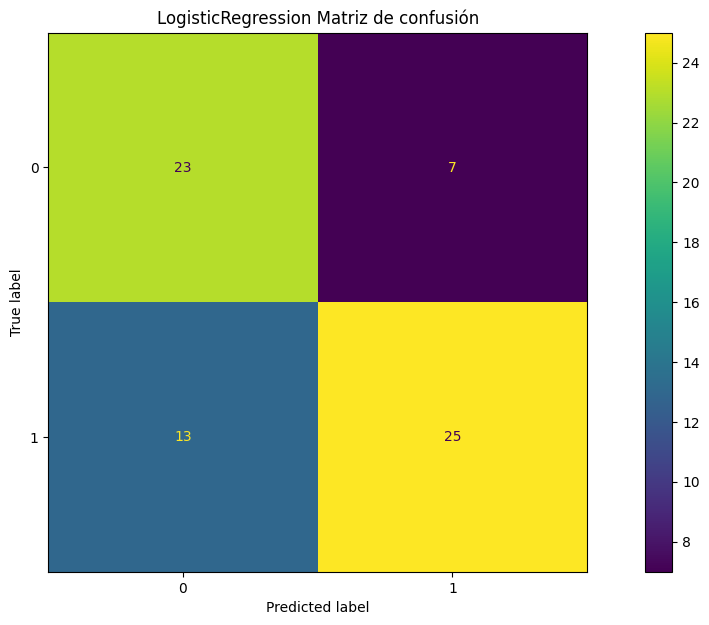

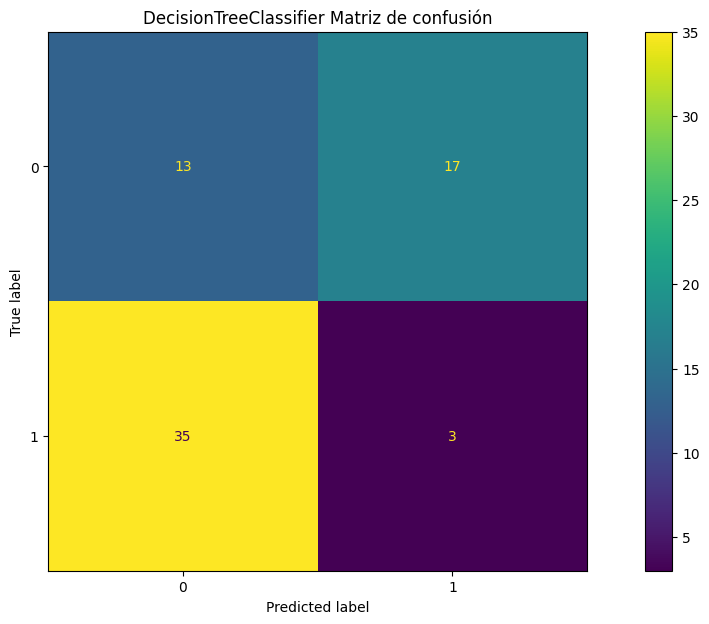

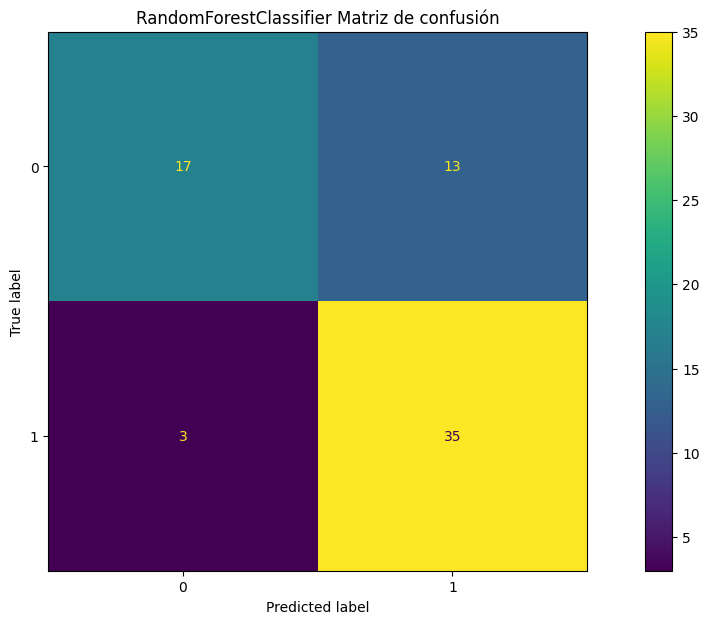

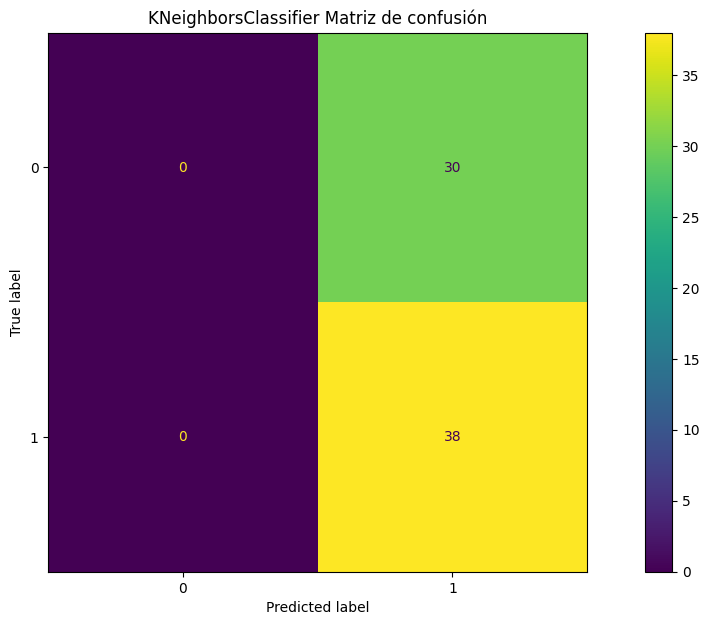

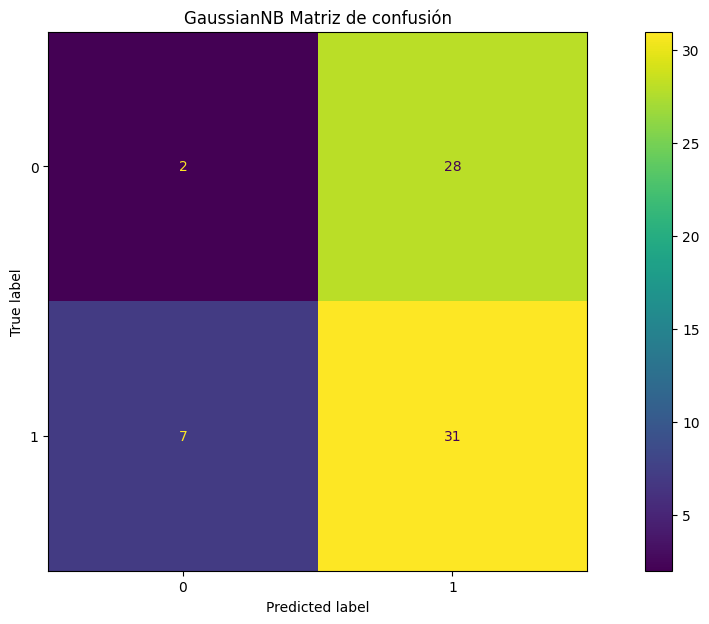

In [ ]:

for i in model_list:
    i_model = i.fit(x2_hp,y2_hp)
    y2pred_hp = i_model.predict(x2_hp)
    y2pred_hp1 = i_model.predict(x2_hp1)
    cm = confusion_matrix(y2_hp1, y2pred_hp1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(str(i.__class__.__name__) + " Matriz de confusión")
    plt.show()